# ROY Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
August 8 2021 9:54 PM
"""

'\nCreated by MinhKhang Nguyen\nAugust 8 2021 9:54 PM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Importing Data ####

In [4]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_rookies-season-stats.html"
rookie_tables = pd.read_html(html_url, header=1)
len(rookie_tables)
rookie = rookie_tables[0]
rookie.head(25)

,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,7,47,8,23,1,...,0,3,19,.348,.100,.667,6.7,2.7,1.9,0.7
1,2,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,3,19,3,8,1,...,0,1,7,.375,.333,NaN,6.3,2.3,0.7,0.3
2,3,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,3,6,0,0,0,...,0,0,0,NaN,NaN,NaN,2.0,0.0,0.3,0.7
3,4,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,18,237,35,70,5,...,20,28,93,.500,.385,.750,13.2,5.2,2.2,1.4
4,5,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,16,558,97,202,4,...,33,42,234,.480,.250,.720,34.9,14.6,8.4,3.3
5,6,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,8,59,11,16,0,...,0,7,27,.688,.000,.714,7.4,3.4,2.6,0.1
6,7,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,6,23,3,7,1,...,4,0,10,.429,.250,1.000,3.8,1.7,1.3,0.0
7,8,Brandon Boston,"Oct 25, '21, LAC vs. POR",20,1,7,55,7,21,2,...,2,2,20,.333,.333,.800,7.9,2.9,1.0,0.4
8,9,James Bouknight,"Oct 22, '21, CHO @ CLE",21,1,6,9,0,5,0,...,0,1,0,.000,.000,NaN,1.5,0.0,0.3,0.0
9,10,Greg Brown,"Oct 23, '21, POR vs. PHO",20,1,6,30,6,17,0,...,2,4,14,.353,.000,.400,5.0,2.3,2.0,0.7


In [5]:
rookie.columns

Index(['Rk', 'Player', 'Debut', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1'],
      dtype='object')

#### Cleaning DataFrame ####

In [6]:
#renames columns to strings only#
rookie.rename(
    columns={
        '3P': 'TP',
        '3PA': 'TPA',
        'FG%': 'FGP',
        '3P%': 'TPP',
        'FT%': 'FTP',
        'MP.1': 'MPG',
        'PTS.1': 'PPG',
        'TRB.1': 'RPG',
        'AST.1': 'APG',
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
rookie.drop_duplicates(subset=['Player'], keep=False, inplace=True)

#Dropping "Rk" Column#
rookie.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
rookie.fillna(0, inplace=True)

rookie.head(25)

,Player,Debut,Age,Yrs,G,MP,FG,FGA,TP,TPA,...,TOV,PF,PTS,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,7,47,8,23,1,10,...,0,3,19,.348,.100,.667,6.7,2.7,1.9,0.7
1,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,3,19,3,8,1,3,...,0,1,7,.375,.333,0,6.3,2.3,0.7,0.3
2,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,3,6,0,0,0,0,...,0,0,0,0,0,0,2.0,0.0,0.3,0.7
3,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,18,237,35,70,5,13,...,20,28,93,.500,.385,.750,13.2,5.2,2.2,1.4
4,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,16,558,97,202,4,16,...,33,42,234,.480,.250,.720,34.9,14.6,8.4,3.3
5,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,8,59,11,16,0,3,...,0,7,27,.688,.000,.714,7.4,3.4,2.6,0.1
6,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,6,23,3,7,1,4,...,4,0,10,.429,.250,1.000,3.8,1.7,1.3,0.0
7,Brandon Boston,"Oct 25, '21, LAC vs. POR",20,1,7,55,7,21,2,6,...,2,2,20,.333,.333,.800,7.9,2.9,1.0,0.4
8,James Bouknight,"Oct 22, '21, CHO @ CLE",21,1,6,9,0,5,0,1,...,0,1,0,.000,.000,0,1.5,0.0,0.3,0.0
9,Greg Brown,"Oct 23, '21, POR vs. PHO",20,1,6,30,6,17,0,4,...,2,4,14,.353,.000,.400,5.0,2.3,2.0,0.7


#### Filtering DataFrame ####

In [7]:
rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']] = rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']].apply(pd.to_numeric)

In [8]:
rookie.drop(rookie[rookie['G'] <= 4].index, inplace = True)
rookie.drop(rookie[rookie['TP'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPA'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPP'] <= 0.1].index, inplace = True)
#rookie.drop(rookie[rookie['PTS'] <= 8].index, inplace = True)#

In [9]:
rookie.drop(['Debut','Yrs','MP','ORB','TRB','AST','PTS'], axis=1, inplace=True)

In [10]:
rookie

,Player,Age,G,FG,FGA,TP,TPA,FT,FTA,STL,BLK,TOV,PF,FGP,TPP,FTP,MPG,PPG,RPG,APG
3,Dalano Banton,22,18,35,70,5,13,18,24,9,5,20,28,0.500,0.385,0.750,13.2,5.2,2.2,1.4
4,Scottie Barnes,20,16,97,202,4,16,36,50,17,9,33,42,0.480,0.250,0.720,34.9,14.6,8.4,3.3
6,Leandro Bolmaro,21,6,3,7,1,4,3,3,0,0,4,0,0.429,0.250,1.000,3.8,1.7,1.3,0.0
7,Brandon Boston,20,7,7,21,2,6,4,5,4,1,2,2,0.333,0.333,0.800,7.9,2.9,1.0,0.4
10,Jared Butler,21,12,6,24,3,14,2,4,1,6,7,11,0.250,0.214,0.500,4.5,1.4,0.6,0.6
12,Josh Christopher,20,10,10,30,1,6,4,6,6,0,6,5,0.333,0.167,0.667,7.9,2.5,1.0,1.1
15,Cade Cunningham,20,11,57,163,21,83,20,22,15,6,35,25,0.350,0.253,0.909,31.6,14.1,6.4,4.6
16,Ayo Dosunmu,22,16,37,87,13,32,5,9,6,2,13,20,0.425,0.406,0.556,16.0,5.8,2.4,0.9
18,Chris Duarte,24,16,85,196,31,79,13,17,15,1,26,32,0.434,0.392,0.765,30.4,13.4,4.2,2.0
23,Usman Garuba,19,7,5,14,2,8,0,0,2,4,2,4,0.357,0.250,0.000,6.4,1.7,2.6,0.9


#### Processing the Data ####

In [11]:
for index, row in rookie.iterrows():
    rookie.loc[index, "ROY Score"] = (row['PPG']+row['RPG']+(row['STL']/row['G'])+row['APG']+(row['BLK']/row['G'])-(row['TOV']/row['G'])-((row['FGA']-row['FG'])/row['G'])) * (row['PPG']+row['RPG']+(row['STL']/row['G'])+(0.5*(row['APG']))+(0.5*(row['BLK']/row['G']))-((row['FGA']-row['FG'])/row['G'])-(row['TOV']/row['G'])-((row['FTA']-row['FT'])/row['G'])-(0.5*(row['FG'])/row['G']))

#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency))(Win Score)#

In [12]:
rookie.sort_values(by=['ROY Score'], ascending=False, inplace=True)
roy = rookie.copy()
roy['ROY Score'] = round(roy['ROY Score'],2)
roy['SPG'] = round(roy['STL']/roy['G'],1)
roy['BLKG'] = round(roy['BLK']/roy['G'],1)
roy['TOVG'] = round(roy['TOV']/roy['G'],1)
roy['PFG'] = round(roy['PF']/roy['G'],1)
roy['FG%'] = roy['FGP']*100
roy['3P%'] = roy['TPP']*100
roy['FT%'] = roy['FTP']*100
roy.drop(['FG','FGA','TP','TPA','FT','FTA','STL','BLK','TOV','PF','FGP','TPP','FTP'], axis=1, inplace=True)

roy.rename(
    columns={
        'MPG': 'MP',
        'PPG': 'PTS',
        'RPG': 'REB',
        'APG': 'AST',
        'SPG': 'STL',
        'BLKG': 'BLK',
        'TOVG': 'TOV',
        'PFG': 'PF',
    }, inplace=True)

roy.head(15)

,Player,Age,G,MP,PTS,REB,AST,ROY Score,STL,BLK,TOV,PF,FG%,3P%,FT%
51,Evan Mobley,20,15,33.7,14.6,8.0,2.5,285.19,1.0,1.6,1.8,2.0,49.4,30.8,77.1
4,Scottie Barnes,20,16,34.9,14.6,8.4,3.3,259.83,1.1,0.6,2.1,2.6,48.0,25.0,72.0
25,Josh Giddey,19,16,29.3,10.0,7.3,5.6,148.20,1.1,0.6,2.7,1.8,39.2,27.8,57.9
15,Cade Cunningham,20,11,31.6,14.1,6.4,4.6,125.53,1.4,0.5,3.2,2.3,35.0,25.3,90.9
72,Franz Wagner,20,17,31.5,13.2,3.9,2.1,125.06,1.2,0.5,1.1,2.7,44.3,37.5,79.4
18,Chris Duarte,24,16,30.4,13.4,4.2,2.0,97.50,0.9,0.1,1.6,2.0,43.4,39.2,76.5
62,Alperen Şengün,19,15,18.7,8.8,4.7,2.1,96.73,1.2,0.5,2.0,2.9,47.3,41.2,66.1
61,Jeremiah Robinson-Earl,21,16,20.3,6.4,5.2,0.7,66.06,0.6,0.3,0.8,1.2,44.1,36.2,57.1
26,Jalen Green,19,16,32.5,14.5,3.3,2.6,54.57,0.7,0.2,3.0,1.6,37.9,28.4,79.6
37,Herb Jones,23,15,24.5,6.0,3.0,1.5,48.94,1.2,0.7,1.3,2.9,48.1,35.7,78.6


#### Visualization ####

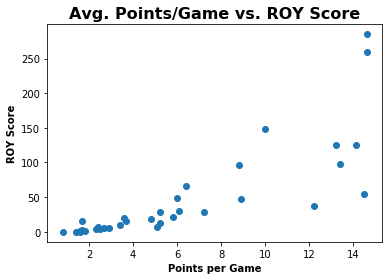

In [13]:
x = roy['PTS']
y = roy['ROY Score']

plt.scatter(x, y)
plt.title('Avg. Points/Game vs. ROY Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Points per Game', fontdict={'fontweight':'bold'})
plt.ylabel('ROY Score', fontdict={'fontweight':'bold'})
plt.show()

In [14]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [15]:
roy.set_index(['Player', 'Age', 'G', 'MP','FG%', '3P%', 'FT%', 'TOV', 'PF', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'ROY Score'], inplace=True)
roy = roy.head(15)
roy

,,,,,,,,,,,,,,
Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score
Evan Mobley,20,15,33.7,49.4,30.8,77.1,1.8,2.0,8.0,2.5,1.0,1.6,14.6,285.19
Scottie Barnes,20,16,34.9,48.0,25.0,72.0,2.1,2.6,8.4,3.3,1.1,0.6,14.6,259.83
Josh Giddey,19,16,29.3,39.2,27.8,57.9,2.7,1.8,7.3,5.6,1.1,0.6,10.0,148.20
Cade Cunningham,20,11,31.6,35.0,25.3,90.9,3.2,2.3,6.4,4.6,1.4,0.5,14.1,125.53
Franz Wagner,20,17,31.5,44.3,37.5,79.4,1.1,2.7,3.9,2.1,1.2,0.5,13.2,125.06
Chris Duarte,24,16,30.4,43.4,39.2,76.5,1.6,2.0,4.2,2.0,0.9,0.1,13.4,97.50
Alperen Şengün,19,15,18.7,47.3,41.2,66.1,2.0,2.9,4.7,2.1,1.2,0.5,8.8,96.73
Jeremiah Robinson-Earl,21,16,20.3,44.1,36.2,57.1,0.8,1.2,5.2,0.7,0.6,0.3,6.4,66.06
Jalen Green,19,16,32.5,37.9,28.4,79.6,3.0,1.6,3.3,2.6,0.7,0.2,14.5,54.57


#### Exporting ####

###### ROY Table to CSV ######

In [16]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = roy.to_csv(str("MVP " + filename))

In [17]:
roy.to_csv(output)

'Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score\r\nEvan Mobley,20,15,33.7,49.4,30.8,77.10000000000001,1.8,2.0,8.0,2.5,1.0,1.6,14.6,285.19\r\nScottie Barnes,20,16,34.9,48.0,25.0,72.0,2.1,2.6,8.4,3.3,1.1,0.6,14.6,259.83\r\nJosh Giddey,19,16,29.3,39.2,27.800000000000004,57.9,2.7,1.8,7.3,5.6,1.1,0.6,10.0,148.2\r\nCade Cunningham,20,11,31.6,35.0,25.3,90.9,3.2,2.3,6.4,4.6,1.4,0.5,14.1,125.53\r\nFranz Wagner,20,17,31.5,44.3,37.5,79.4,1.1,2.7,3.9,2.1,1.2,0.5,13.2,125.06\r\nChris Duarte,24,16,30.4,43.4,39.2,76.5,1.6,2.0,4.2,2.0,0.9,0.1,13.4,97.5\r\nAlperen Şengün,19,15,18.7,47.3,41.199999999999996,66.10000000000001,2.0,2.9,4.7,2.1,1.2,0.5,8.8,96.73\r\nJeremiah Robinson-Earl,21,16,20.3,44.1,36.199999999999996,57.099999999999994,0.8,1.2,5.2,0.7,0.6,0.3,6.4,66.06\r\nJalen Green,19,16,32.5,37.9,28.4,79.60000000000001,3.0,1.6,3.3,2.6,0.7,0.2,14.5,54.57\r\nHerb Jones,23,15,24.5,48.1,35.699999999999996,78.60000000000001,1.3,2.9,3.0,1.5,1.2,0.7,6.0,48.94\r\nDavion Mitchell,23,17,25.4,